<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Get-to-know-Directory-Structure" data-toc-modified-id="Get-to-know-Directory-Structure-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get to know Directory Structure</a></span></li><li><span><a href="#Get-to-know-File-Format" data-toc-modified-id="Get-to-know-File-Format-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Get to know File Format</a></span></li></ul></li><li><span><a href="#Get-to-know-each-image-shape-and-mode" data-toc-modified-id="Get-to-know-each-image-shape-and-mode-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get to know each image shape and mode</a></span><ul class="toc-item"><li><span><a href="#Central-Tendency" data-toc-modified-id="Central-Tendency-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Central Tendency</a></span></li></ul></li><li><span><a href="#Classical-Machine-Learning-using-Sklearn-Library" data-toc-modified-id="Classical-Machine-Learning-using-Sklearn-Library-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classical Machine Learning using Sklearn Library</a></span><ul class="toc-item"><li><span><a href="#Model-Selection-:-Holdout-Strategy" data-toc-modified-id="Model-Selection-:-Holdout-Strategy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model Selection : Holdout Strategy</a></span></li><li><span><a href="#Feature-Extraction-:-RGB2GRAY-->-HogTransformer-->-Standarized" data-toc-modified-id="Feature-Extraction-:-RGB2GRAY-->-HogTransformer-->-Standarized-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Feature Extraction : RGB2GRAY -&gt; HogTransformer -&gt; Standarized</a></span></li><li><span><a href="#Pipelining" data-toc-modified-id="Pipelining-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Pipelining</a></span></li><li><span><a href="#HyperParameter-Tuning-:-GridSearch" data-toc-modified-id="HyperParameter-Tuning-:-GridSearch-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>HyperParameter Tuning : GridSearch</a></span></li><li><span><a href="#Score-and-Evaluation" data-toc-modified-id="Score-and-Evaluation-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Score and Evaluation</a></span></li></ul></li><li><span><a href="#Deep-Learning-using-Tensorflow-Library" data-toc-modified-id="Deep-Learning-using-Tensorflow-Library-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Deep Learning using Tensorflow Library</a></span><ul class="toc-item"><li><span><a href="#Data-augmentation" data-toc-modified-id="Data-augmentation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data augmentation</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Score-and-Evaluation" data-toc-modified-id="Score-and-Evaluation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Score and Evaluation</a></span></li></ul></li><li><span><a href="#Classical-Machine-Learning-VS-Deep-Learning-Score-and-Evaluation" data-toc-modified-id="Classical-Machine-Learning-VS-Deep-Learning-Score-and-Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Classical Machine Learning VS Deep Learning Score and Evaluation</a></span></li></ul></div>

In [1]:
#matplotlib inline so we can plot inline 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import re

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report


# Prepare Dataset

In [15]:
#Make .kaggle folder on /root 
!mkdir /root/.kaggle

In [16]:
#move kaggle.json to /root/.kaggle
#Place your kaggle.json on content folder
!mv /content/kaggle.json /root/.kaggle

In [17]:
#Download Datasets
!kaggle datasets download -d dhruvmak/face-mask-detection

 99% 192M/194M [00:01<00:00, 172MB/s]
100% 194M/194M [00:01<00:00, 140MB/s]


In [ ]:
#Unzip Dataset
!unzip /content/face-mask-detection.zip -d /content

## Exploratory Data Analysis


In [19]:
path_to_data = "C:/Users/Astrowest/Documents/DtSense/Tugas Akhir/dataset"

### Get to know Directory Structure

In [20]:
def list_dir_structure(path):
  for dirpath, dirnames, filenames in os.walk(path):
    level = dirpath.replace(path, '').count('/')
    indent = ' '*4*level 
    print("{}{}/".format(indent, os.path.basename(dirpath)))
    subindent = ' ' * 4 * (level + 1)
    for f in filenames[:5]:
            print('{}{}'.format(subindent, f))

In [21]:
list_dir_structure(path_to_data)

dataset/
without_mask/
    image_0.png
    image_1.png
    image_10.png
    image_100.png
    image_101.png
with_mask/
    image_0.png
    image_1.png
    image_10.png
    image_100.png
    image_101.png


### Get to know File Format

In [22]:
with_mask_folder = os.path.join(path_to_data, "with_mask")
without_mask_folder = os.path.join(path_to_data, "without_mask")

In [23]:
file_folder_with_mask_folder = os.listdir(with_mask_folder)
file_folder_without_mask_folder = os.listdir(without_mask_folder)

In [24]:
all_file_format = []
file_format_with_mask_folder = [re.search('\.(\w)*', file).group(0) for file in file_folder_with_mask_folder if '.' in file]
file_format_without_mask_folder = [re.search('\.(\w)*', file).group(0) for file in file_folder_without_mask_folder if '.' in file]

for file_format in file_format_with_mask_folder+file_format_without_mask_folder :
  if file_format in file_format_with_mask_folder :
    all_file_format.append([file_format, "with_mask_folder"])
  else :
    all_file_format.append([file_format, "without_mask_folder"])

all_file_format = np.array(all_file_format)

C:\Users\Astrowest\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

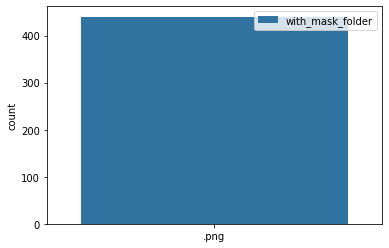

In [25]:
import seaborn as sns 

sns.countplot(all_file_format[:,0], hue= all_file_format[:, 1])

we can see all file on folder (with mask and without mask) are in .png format

## Get to know each image shape and mode



In [26]:
with_mask_image_shape = []
without_mask_image_shape = []

for file_folder in file_folder_with_mask_folder :
  #we already know all format is .png so simply we just need to filter all . in file to know the file are image
  if '.' in file_folder :
    with_mask_image_shape.append(np.asarray(PIL.Image.open(os.path.join(with_mask_folder, file_folder))).shape)

for file_folder in file_folder_without_mask_folder :
  #we already know all format is .png so simply we just need to filter all . in file to know the file are image
  if '.' in file_folder :
    without_mask_image_shape.append(np.asarray(PIL.Image.open(os.path.join(without_mask_folder, file_folder))).shape)

with_mask_image_shape = np.asarray(with_mask_image_shape)
without_mask_image_shape = np.asarray(without_mask_image_shape)

In [27]:
all_image_shape =np.concatenate((with_mask_image_shape, without_mask_image_shape), axis = 0)

### Central Tendency

In [28]:
# form of all_image_shape = width, height, num_channel
pd.DataFrame({'mean':np.mean(all_image_shape, axis= 0), 'median': np.median(all_image_shape, axis=0)}, index = ['width', 'height', 'n_channel'])

,mean,median
width,581.706818,600.0
height,609.197727,600.0
n_channel,3.254545,3.0


C:\Users\Astrowest\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

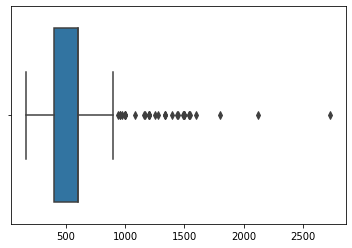

In [29]:
sns.boxplot(all_image_shape[:,0])

C:\Users\Astrowest\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

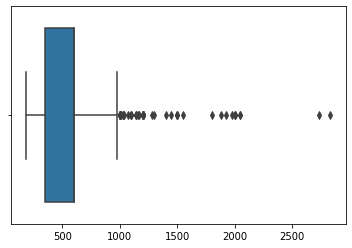

In [30]:
sns.boxplot(all_image_shape[:, 1])

<AxesSubplot:ylabel='Count'>

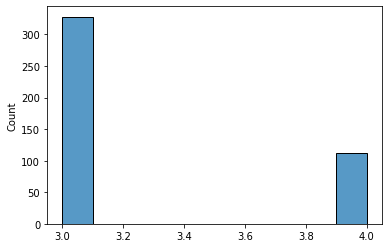

In [31]:
sns.histplot(all_image_shape[:,2])

# Load Data

In [32]:
def load_data(directory, image_size=(512, 512)):
  total_image = 0
  label_names_list = [folder for folder in os.listdir(directory)]

  #Calculate how many image to make multidimensional Array
  for label_name in label_names_list :
    total_image += len(os.listdir(os.path.join(directory,label_name)))
    #Get dict of target_names from target_names_list

  #Define array of image and target
  stack_of_image = np.empty((total_image,image_size[0],image_size[1],3))
  stack_of_label = np.empty(total_image)

  
  temp = total_image 
  for i, label_name  in enumerate(label_names_list) :
    image_class_path = os.path.join(directory,label_name)
    for image in os.listdir(image_class_path) :
      image = os.path.join(image_class_path,image)
      
      #Open Image
      image = PIL.Image.open(image)
      #Resize Image
      resized_image = image.resize(image_size)
      resized_image_array = np.asarray(resized_image)
      
     
      #Convert to RGB if image not RGB
      if resized_image_array.ndim != 3 :
        resized_image_array = np.asarray(resized_image.convert('RGB'))
      elif (resized_image_array.ndim == 3) and (resized_image_array.shape[2] != 3) :
        resized_image_array = np.asarray(resized_image.convert('RGB'))

      #Append to Array
      stack_of_image[total_image-temp] = resized_image_array
      stack_of_label[total_image-temp] = i
      temp -= 1       
  
  
  return (stack_of_image, stack_of_label)
  

In [34]:
target_names = os.listdir(path_to_data)
target_names

['without_mask', 'with_mask']

In [87]:
X, y = load_data(path_to_data)

## Classical Machine Learning using Sklearn Library

### Model Selection : Holdout Strategy 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Feature Extraction : RGB2GRAY -> HogTransformer -> Standarized
Tree and probability based algorithm dont need to standarize or normalize

In [136]:
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

### Pipelining 

In [137]:
svc_steps = [
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify',MinMaxScaler()),
    ('classify', SVC(kernel ='rbf',decision_function_shape = 'ovo'))
]

knn_steps = [
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', MinMaxScaler()),
    ('classify', KNeighborsClassifier(metric = "euclidean"))
]

naivebayes_steps = [    
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('classify', GaussianNB())
]

decisiontree_steps =  [    
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('classify', DecisionTreeClassifier())
]

randomforests_steps =  [    
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('classify', RandomForestClassifier())
]

mlp_steps = [
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', MinMaxScaler()),
    ('classify', MLPClassifier(activation= 'relu',max_iter= 20))
]

svc_pipe = Pipeline(svc_steps)
knn_pipe = Pipeline(knn_steps)
naivebayes_pipe = Pipeline(naivebayes_steps)
decisiontree_pipe = Pipeline(decisiontree_steps)
randomforests_pipe = Pipeline(randomforests_steps)
mlp_pipe = Pipeline(mlp_steps)

### HyperParameter Tuning : GridSearch 

In [138]:
svc_params = {"classify__C": [1.0, 5.0, 10.0, 50.0],
             "classify__gamma": ["scale", "auto"]}

knn_params = {"classify__n_neighbors":[3, 5, 7]}

decisiontree_params = {"classify__criterion":["entropy", "gini"]}

randomforests_params = {"classify__criterion":["entropy", "gini"]}

mlp_params = {"classify__hidden_layer_sizes": [(64,64),(512, 64), (128, 512), (256, 512), (512, 512), (64, 512)]}

In [139]:
svc_grid = GridSearchCV(svc_pipe, svc_params)
knn_grid = GridSearchCV(knn_pipe, knn_params)
decisiontree_grid = GridSearchCV(decisiontree_pipe, decisiontree_params)
randomforests_grid = GridSearchCV(randomforests_pipe, randomforests_params)
mlp_grid = GridSearchCV(mlp_pipe, mlp_params)

In [140]:
svc_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                                       ('hogify',
                                        HogTransformer(cells_per_block=(2, 2),
                                                       pixels_per_cell=(14,
                                                                        14))),
                                       ('scalify', MinMaxScaler()),
                                       ('classify',
                                        SVC(decision_function_shape='ovo'))]),
             param_grid={'classify__C': [1.0, 5.0, 10.0, 50.0],
                         'classify__gamma': ['scale', 'auto']})

In [141]:
mlp_grid.fit(X_train, y_train)

C:\Users\Astrowest\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Astrowest\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Astrowest\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Astrowest\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached 

GridSearchCV(estimator=Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                                       ('hogify',
                                        HogTransformer(cells_per_block=(2, 2),
                                                       pixels_per_cell=(14,
                                                                        14))),
                                       ('scalify', MinMaxScaler()),
                                       ('classify',
                                        MLPClassifier(max_iter=20))]),
             param_grid={'classify__hidden_layer_sizes': [(64, 64), (512, 64),
                                                          (128, 512),
                                                          (256, 512),
                                                          (512, 512),
                                                          (64, 512)]})

In [142]:
decisiontree_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                                       ('hogify',
                                        HogTransformer(cells_per_block=(2, 2),
                                                       pixels_per_cell=(14,
                                                                        14))),
                                       ('classify', DecisionTreeClassifier())]),
             param_grid={'classify__criterion': ['entropy', 'gini']})

In [143]:
randomforests_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                                       ('hogify',
                                        HogTransformer(cells_per_block=(2, 2),
                                                       pixels_per_cell=(14,
                                                                        14))),
                                       ('classify', RandomForestClassifier())]),
             param_grid={'classify__criterion': ['entropy', 'gini']})

In [144]:
naivebayes_pipe.fit(X_train, y_train)

Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify',
                 HogTransformer(cells_per_block=(2, 2),
                                pixels_per_cell=(14, 14))),
                ('classify', GaussianNB())])

In [145]:
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                                       ('hogify',
                                        HogTransformer(cells_per_block=(2, 2),
                                                       pixels_per_cell=(14,
                                                                        14))),
                                       ('scalify', MinMaxScaler()),
                                       ('classify',
                                        KNeighborsClassifier(metric='euclidean'))]),
             param_grid={'classify__n_neighbors': [3, 5, 7]})

### Score and Evaluation

In [146]:
svc_grid.score(X_test, y_test)

0.8181818181818182

In [147]:
knn_grid.score(X_test, y_test)

0.5340909090909091

In [148]:
decisiontree_grid.score(X_test, y_test)

0.7386363636363636

In [149]:
randomforests_grid.score(X_test, y_test)

0.8068181818181818

In [150]:
mlp_grid.score(X_test, y_test)

0.8068181818181818

In [151]:
naivebayes_pipe.score(X_test, y_test)

0.8068181818181818

In [229]:
print("============== SVC Model  ================")
print(classification_report(y_test, svc_grid.predict(X_test),target_names = target_names))
print("============== Naive Bayes Model  ================")
print(classification_report(y_test,naivebayes_pipe.predict(X_test),target_names = target_names))
print("============== Random Forests Model  ================")
print(classification_report(y_test, randomforests_grid.predict(X_test),target_names = target_names))
print("============== MLP Model  ================")
print(classification_report(y_test, mlp_grid.predict(X_test),target_names = target_names))
print("============== KNN Model  ================")
print(classification_report(y_test, knn_grid.predict(X_test),target_names = target_names))
print("============== Decision Tree Model  ================")
print(classification_report(y_test, decisiontree_grid.predict(X_test),target_names = target_names))

============== SVC Model  ================
              precision    recall  f1-score   support

without_mask       0.80      0.80      0.80        41
   with_mask       0.83      0.83      0.83        47

    accuracy                           0.82        88
   macro avg       0.82      0.82      0.82        88
weighted avg       0.82      0.82      0.82        88

============== Naive Bayes Model  ================
              precision    recall  f1-score   support

without_mask       0.80      0.78      0.79        41
   with_mask       0.81      0.83      0.82        47

    accuracy                           0.81        88
   macro avg       0.81      0.81      0.81        88
weighted avg       0.81      0.81      0.81        88

============== Random Forests Model  ================
              precision    recall  f1-score   support

without_mask       0.80      0.78      0.79        41
   with_mask       0.81      0.83      0.82        47

    accuracy                      

Because SVC Model has high score on Accuration and f1-score(without Mask & with Mask) compared to other model, we will choose SVC model

## Deep Learning using Tensorflow Library

### Data augmentation

In [248]:
#Define 
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split= 0.2
)

In [249]:
datagen.fit(X_train)

### Modeling 

In [254]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(512, 512, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [255]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [256]:
history = model.fit(datagen.flow(X_train, y_train,subset='training'),
         validation_data=datagen.flow(X_test, y_test, subset='validation'),epochs=10)

Epoch 1/10
9/9 [==============================] - 78s 8s/step - loss: 1.6225 - accuracy: 0.5638 - val_loss: 0.5332 - val_accuracy: 0.7059
Epoch 2/10
9/9 [==============================] - 81s 9s/step - loss: 0.4472 - accuracy: 0.7801 - val_loss: 0.9094 - val_accuracy: 0.7647
Epoch 3/10
9/9 [==============================] - 79s 9s/step - loss: 0.3552 - accuracy: 0.8582 - val_loss: 0.4448 - val_accuracy: 0.8235
Epoch 4/10
9/9 [==============================] - 86s 9s/step - loss: 0.2979 - accuracy: 0.8972 - val_loss: 0.9161 - val_accuracy: 0.7647
Epoch 5/10
9/9 [==============================] - 71s 8s/step - loss: 0.2763 - accuracy: 0.9113 - val_loss: 0.4477 - val_accuracy: 0.8824
Epoch 6/10
9/9 [==============================] - 69s 8s/step - loss: 0.2206 - accuracy: 0.9255 - val_loss: 0.9211 - val_accuracy: 0.8235
Epoch 7/10
9/9 [==============================] - 69s 8s/step - loss: 0.2107 - accuracy: 0.9149 - val_loss: 0.9605 - val_accuracy: 0.7647
Epoch 8/10
9/9 [==================

### Score and Evaluation

In [273]:
y_prob = model.predict(X_test) 
y_classes = np.where(y_prob >0.5,1,0)
print(classification_report(y_test, y_classes))

3/3 [==============================] - 5s 1s/step
              precision    recall  f1-score   support

         0.0       0.88      0.68      0.77        41
         1.0       0.77      0.91      0.83        47

    accuracy                           0.81        88
   macro avg       0.82      0.80      0.80        88
weighted avg       0.82      0.81      0.80        88



## Classical Machine Learning VS Deep Learning Score and Evaluation

In [276]:
print("============== SVC Model  ================")
print(classification_report(y_test, svc_grid.predict(X_test),target_names = target_names))
print("============== CNN Model  ================")
print(classification_report(y_test, y_classes, target_names= target_names))

============== SVC Model  ================
              precision    recall  f1-score   support

without_mask       0.80      0.80      0.80        41
   with_mask       0.83      0.83      0.83        47

    accuracy                           0.82        88
   macro avg       0.82      0.82      0.82        88
weighted avg       0.82      0.82      0.82        88

============== CNN Model  ================
              precision    recall  f1-score   support

without_mask       0.88      0.68      0.77        41
   with_mask       0.77      0.91      0.83        47

    accuracy                           0.81        88
   macro avg       0.82      0.80      0.80        88
weighted avg       0.82      0.81      0.80        88



Because SVM have better f1 score  on without_mask compared to CNN. then SVM model will be choosed 